# Support Vector Machines

SVMs are among the best (and many believe are indeed the best) “off-the-shelf” supervised learning algorithm. To tell the SVM story, we’ll need to first talk about margins and the idea of separating data with a large “gap.” Next, we’ll talk about the optimal margin classifier, which will lead us into a digression on Lagrange duality. We’ll also see kernels, which give a way to apply SVMs efficiently in very high dimensional (such as infinite-
dimensional) feature spaces.

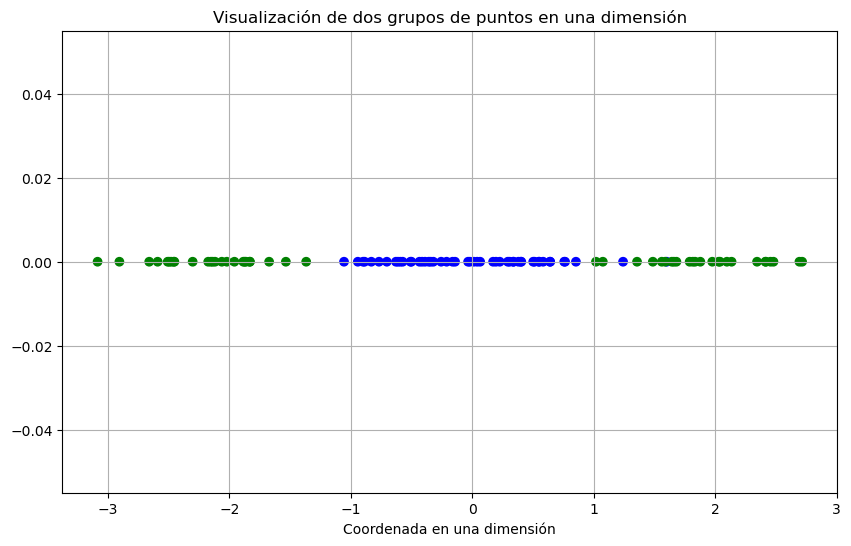

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generar puntos para el grupo 1 en la parte central
group1 = np.random.normal(loc=0, scale=0.5, size=50)
# Generar puntos para el grupo 2 a los lados del grupo 1
group2 =np.hstack( (np.random.normal(loc=-2, scale=0.5, size=25), np.random.normal(loc=2, scale=0.5, size=25)))
# Concatenar los puntos de los dos grupos
points = np.concatenate([group1, group2])
# Etiquetas para los puntos
labels = np.concatenate([np.zeros(50), np.ones(50)])
# Colores para los puntos según sus etiquetas
colors = {0: 'blue', 1: 'green'}
# Visualización de los puntos en una sola dimensión
plt.figure(figsize=(10, 6))
plt.scatter(points, np.zeros_like(points), c=[colors[label] for label in labels], marker='o')
plt.title('Visualización de dos grupos de puntos en una dimensión')
plt.xlabel('Coordenada en una dimensión')

plt.grid(True)



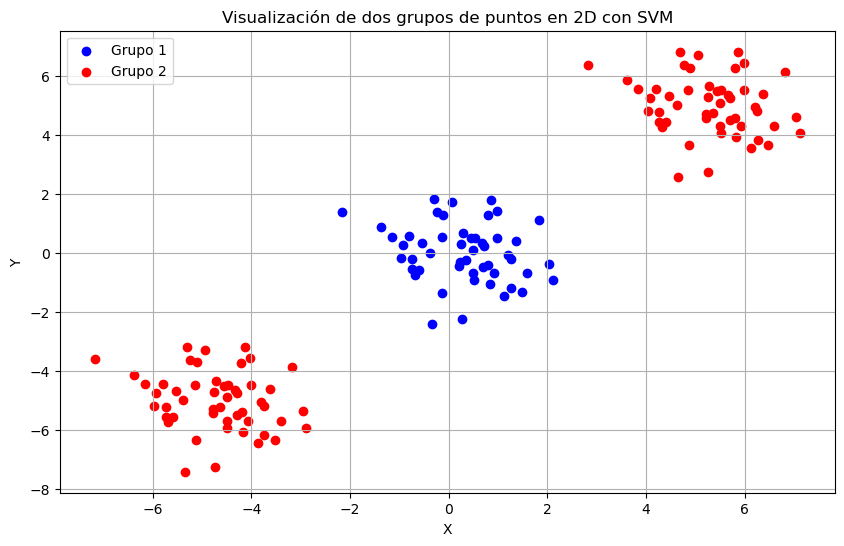

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Generar puntos del grupo 1 en el centro
center_points = np.random.randn(50, 2)

# Generar puntos del grupo 2 a los lados
side_points1 = center_points + np.array([5, 5])
side_points2 = center_points + np.array([-5, -5])

# Combinar los puntos de ambos grupos
X = np.vstack([center_points, side_points1, side_points2])
y = np.hstack([np.zeros(50), np.ones(50), np.ones(50) * 2])
# Visualizar los puntos y el hiperplano de separación
plt.figure(figsize=(10, 6))

# Plot de los puntos del grupo 1
plt.scatter(center_points[:, 0], center_points[:, 1], color='blue', label='Grupo 1')

# Plot de los puntos del grupo 2
plt.scatter(side_points1[:, 0], side_points1[:, 1], color='red', label='Grupo 2')
plt.scatter(side_points2[:, 0], side_points2[:, 1], color='red')


plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualización de dos grupos de puntos en 2D con SVM')
plt.grid(True)
plt.show()


### Experiment 1: let's try a linear kernel

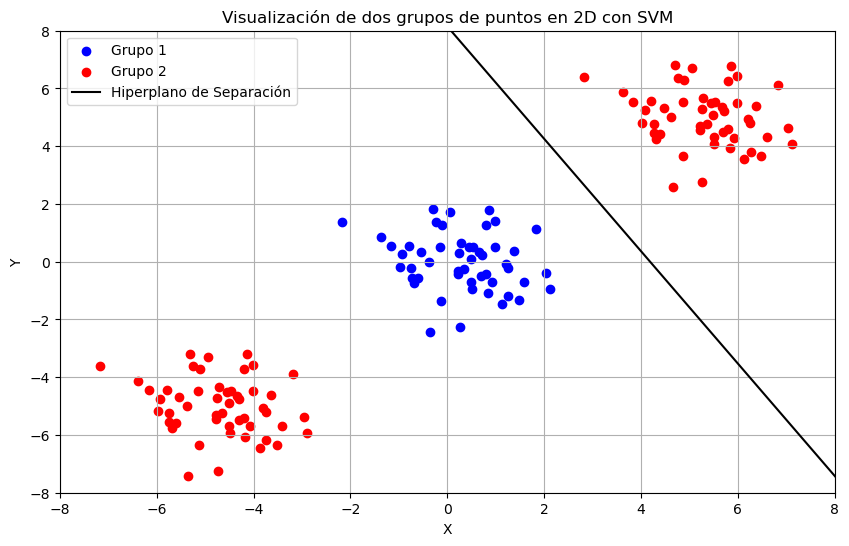

In [3]:
# Visualizar los puntos y el hiperplano de separación
plt.figure(figsize=(10, 6))

# Plot de los puntos del grupo 1
plt.scatter(center_points[:, 0], center_points[:, 1], color='blue', label='Grupo 1')

# Plot de los puntos del grupo 2
plt.scatter(side_points1[:, 0], side_points1[:, 1], color='red', label='Grupo 2')
plt.scatter(side_points2[:, 0], side_points2[:, 1], color='red')


# Entrenar un clasificador SVM
clf = SVC(kernel='linear')
clf.fit(X, y)

# Obtener el hiperplano de separación
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-10, 10)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Plot del hiperplano de separación
plt.plot(xx, yy, 'k-', label='Hiperplano de Separación')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Visualización de dos grupos de puntos en 2D con SVM')
plt.grid(True)
plt.axis([-8,8,-8,8])
plt.show()

### Exercise 1
lets implement the Gaussian kernel

Given two data examples, $(x^i,y^i)$ and $(x^j,y^j)$, where the input vectors $x$ have $n$ features. The Gaussian kernel is defined as:


$K(x^i,x^j)= exp(-\frac{|x^i-x^j|^2}{2\sigma^ 2}) = exp(-\frac{\sum_{k=1} ^ n (x^i _k-x^j _k)^2}{2\sigma^2})$


Parameter $\sigma$ controls the decay speed as the vectors $x^i$ and $x^j$ go appart.

### Your task
Implement a  function to compute the Gaussian Kernel, it should receive two feature vectors and a parameter $\sigma$


Once you’ve completed the function gaussianKernel, the next cell  will test your kernel function on two provided examples and you should expect to see a value of:

    1. 0.6669768108584743   if the input is one dimensional
    2. 0.5352614285189903  if the input is two dimensional

In [1]:
import numpy as np

In [2]:
def gaussianKernel(x1, x2, sigma):
    K = 0
    # Convert inputs to numpy arrays if they aren't already
    import numpy as np
    x1 = np.array(x1)
    x2 = np.array(x2)
    
    # Calculate the squared Euclidean distance
    squared_distance = np.sum(np.square(x1 - x2))
    
    # Calculate the Gaussian kernel
    K = np.exp(-squared_distance / (2 * sigma**2))
    
    return K

In [5]:
x1 = -2.1
x2 = -1.2
sigma = 1;
K = gaussianKernel(x1, x2, sigma)
print('one dimension:', K)

x1 = np.array([1, 1])
x2 = np.array([1.5, 2]) 
sigma = 1;
K = gaussianKernel(x1, x2, sigma)
print('two dimension:', K)

one dimension: 0.6669768108584743
two dimension: 0.5352614285189903


Explore how does it affect the value of $\sigma$ when there are points close together or far appart.

### Exercise 2
We will begin by with a 2D example dataset which can be separated by a linear boundary. The script will plot the training data. In this dataset, the positions of the positive examples (indicated with +) and the negative examples (indicated with o) suggest a natural separation indicated by the gap. However, notice that there is an outlier positive example + on the far left at about (0.1, 4.1). As part of this exercise, you will also see how
this outlier affects the SVM decision boundary.


In [6]:
import matplotlib.pyplot as plt
from sklearn import svm
%matplotlib inline
########################################################################################
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 2, max_x + 2)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)


In this part of the exercise, you will try using different values of the C parameter with SVMs. Informally, the C parameter is a positive value that controls the penalty for misclassified training examples. A large C parameter tells the SVM to try to classify all the examples correctly. C plays a role similar to $\frac{1}{\lambda}$, where $\lambda$ is the regularization parameter that we were using previously for logistic regression.

The next part in run the SVM training (with C = 1) using SVM software that I have included with the starter code, 
When C = 1, you should find that the SVM puts the decision boundary in the gap between the two datasets and misclassifies the data point on the far left.

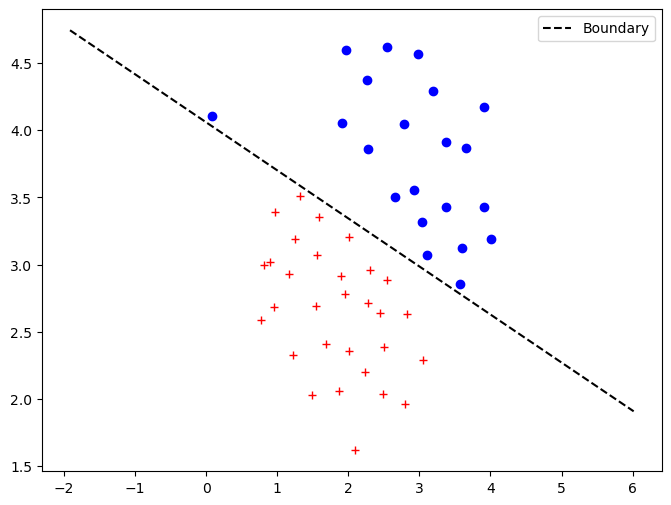

In [8]:
########################################################################################
#cargar dataset1
data=np.loadtxt('Data/dataset1.data',delimiter=',')
X=data[:,:2]
Y=data[:,2].astype(int)
########################
##graficar datos
plt.figure(figsize=(8, 6))

plt.plot(X[Y==0,0],X[Y==0,1],'+r')
plt.plot(X[Y==1,0],X[Y==1,1],'ob')
#create classifiers
C = 100  # parametro de regularizacion de la svm
clf_lin  = svm.SVC(kernel='linear',C=C)

#entrenar
clf_lin.fit(X, Y)
#graficar frontera
min_x=X[:,0].min()
max_x=X[:,0].max()

plot_hyperplane(clf_lin, min_x, max_x, 'k--', label= 'Boundary')
plt.legend();


### Your task
Your task is to try different values of C on this dataset. Specifically, you should change the value of C in the script to C = 100 and run the SVM training again. When C = 100, you should find that the SVM now classifies
every single example correctly, but has a decision boundary that does not appear to be a natural fit for the data

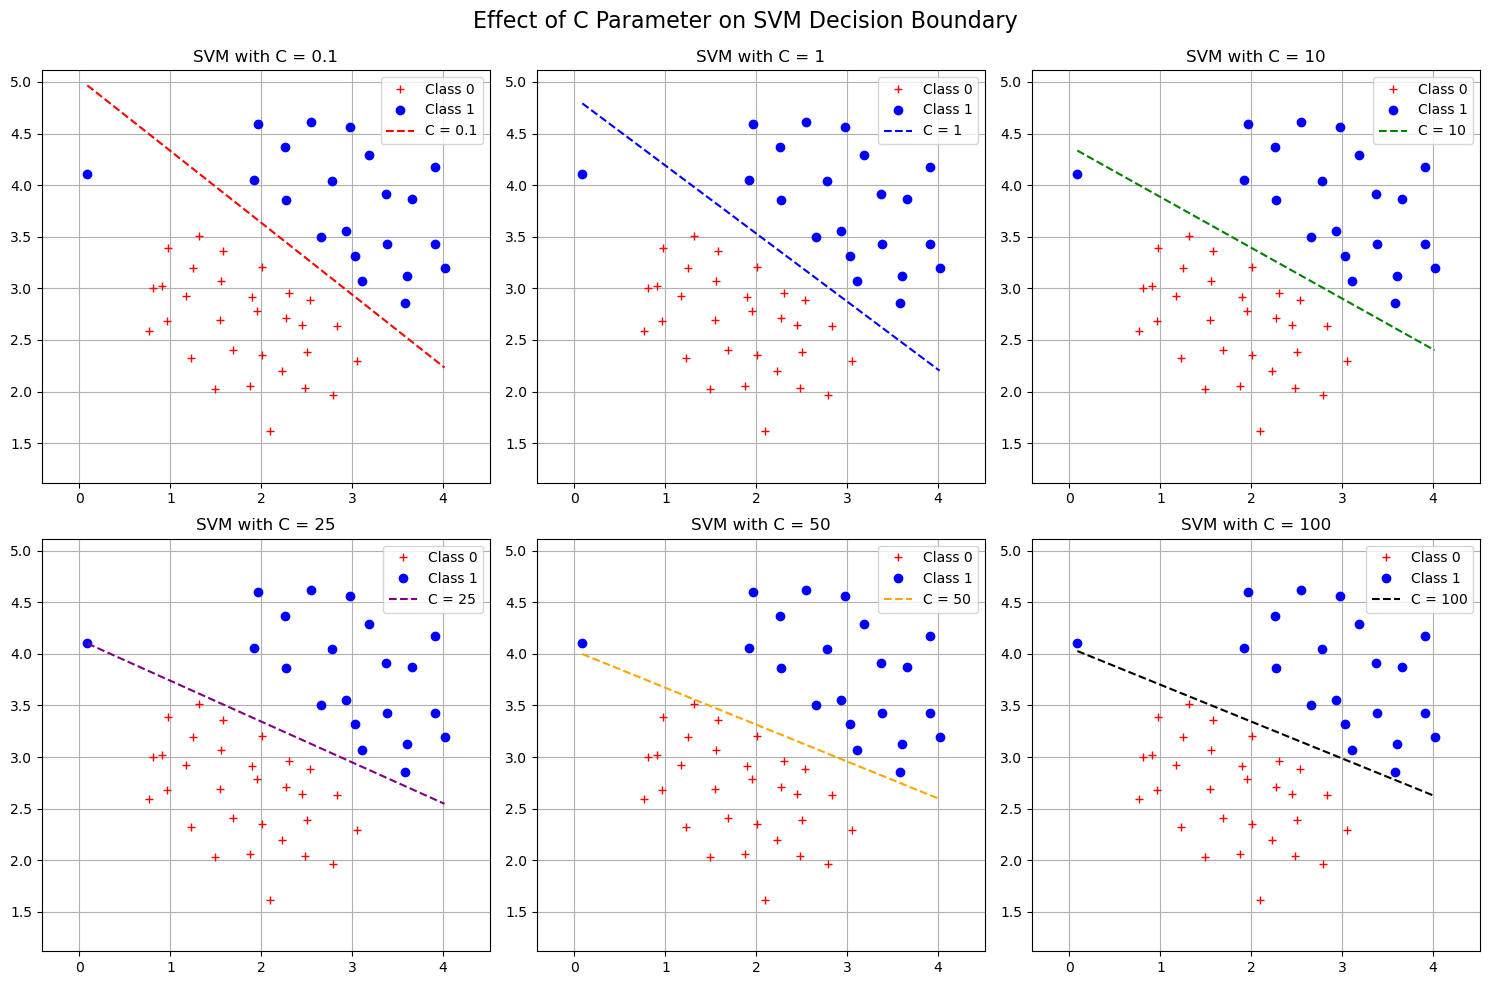

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Load data
data = np.loadtxt('Data/dataset1.data', delimiter=',')
X = data[:, :2]
Y = data[:, 2].astype(int)

# Function to plot hyperplane (I assume this was defined earlier in your code)
def plot_hyperplane(clf, min_x, max_x, linestyle, label, color):
    # Get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x, max_x)
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label, color=color)

# Create a figure with subplots (2x3 grid)
plt.figure(figsize=(15, 10))
C_values = [0.1, 1, 10, 25, 50, 100]
colors = ['red', 'blue', 'green', 'purple', 'orange', 'black']

for i, (C, color) in enumerate(zip(C_values, colors)):
    plt.subplot(2, 3, i+1)
    
    # Plot data points
    plt.plot(X[Y==0, 0], X[Y==0, 1], '+r', label='Class 0')
    plt.plot(X[Y==1, 0], X[Y==1, 1], 'ob', label='Class 1')
    
    # Create and train SVM classifier
    clf_lin = svm.SVC(kernel='linear', C=C)
    clf_lin.fit(X, Y)
    
    # Plot the decision boundary
    min_x = X[:, 0].min()
    max_x = X[:, 0].max()
    plot_hyperplane(clf_lin, min_x, max_x, '--', f'C = {C}', color)
    
    # Add title and legend
    plt.title(f'SVM with C = {C}')
    plt.legend()
    plt.grid(True)
    
    # Ensure consistent axes for better comparison
    plt.xlim([X[:, 0].min() - 0.5, X[:, 0].max() + 0.5])
    plt.ylim([X[:, 1].min() - 0.5, X[:, 1].max() + 0.5])

plt.tight_layout()
plt.suptitle('Effect of C Parameter on SVM Decision Boundary', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()

### Excercise 3
The next part  will load and plot dataset 2. From the plot, you can observe that there is no linear decision boundary that separates the positive and negative examples for this dataset. However, by using the Gaussian kernel with the SVM, you will be able to learn a non-linear
decision boundary that can perform reasonably well for the dataset.

### Your task
You should change the parameter gamma, it is associated with the parameter $\sigma$, from the first equation.You should not use values higher than 50.

What is the effect of changing the parameter gamma?

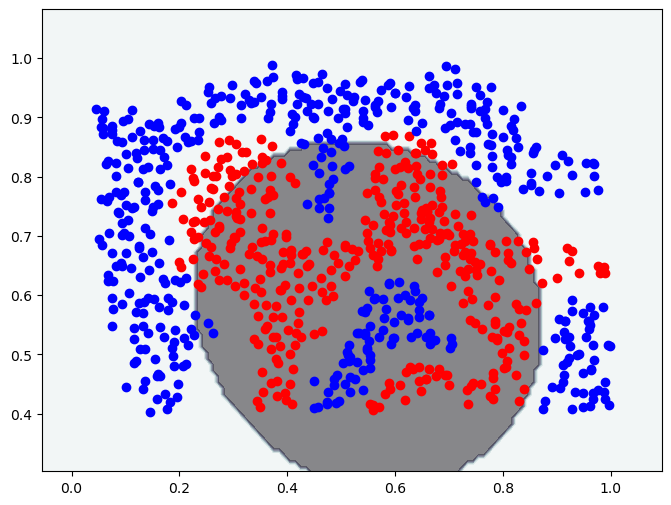

In [11]:
########################################################################################
def plot_hyperplane(clf, X):
    # create a mesh to plot in
    h=0.01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    CS=plt.contourf(xx, yy, Z,cmap=plt.cm.bone,alpha=0.5)
    #CS.cmap.set_under('yellow')
    #CS.cmap.set_over('cyan')

########################################################################################
#cargar dataset2
data=np.loadtxt('Data/dataset2.data',delimiter=',')
X=data[:,:2]
Y=data[:,2].astype(int)
########################
##graficar datos
plt.figure(figsize=(8, 6))

plt.plot(X[Y==0,0],X[Y==0,1],'or')
plt.plot(X[Y==1,0],X[Y==1,1],'ob')
########################################################################
#create classifiers
C    = 1  # parametro de regularizacion de la svm
gamma= 1 #parametro gamma de la funcion de base radial
clf_rbf     = svm.SVC(kernel='rbf', gamma=gamma, C=C)
#entrenar
clf_rbf.fit(X, Y)

#graficar frontera
plot_hyperplane(clf_rbf,X)



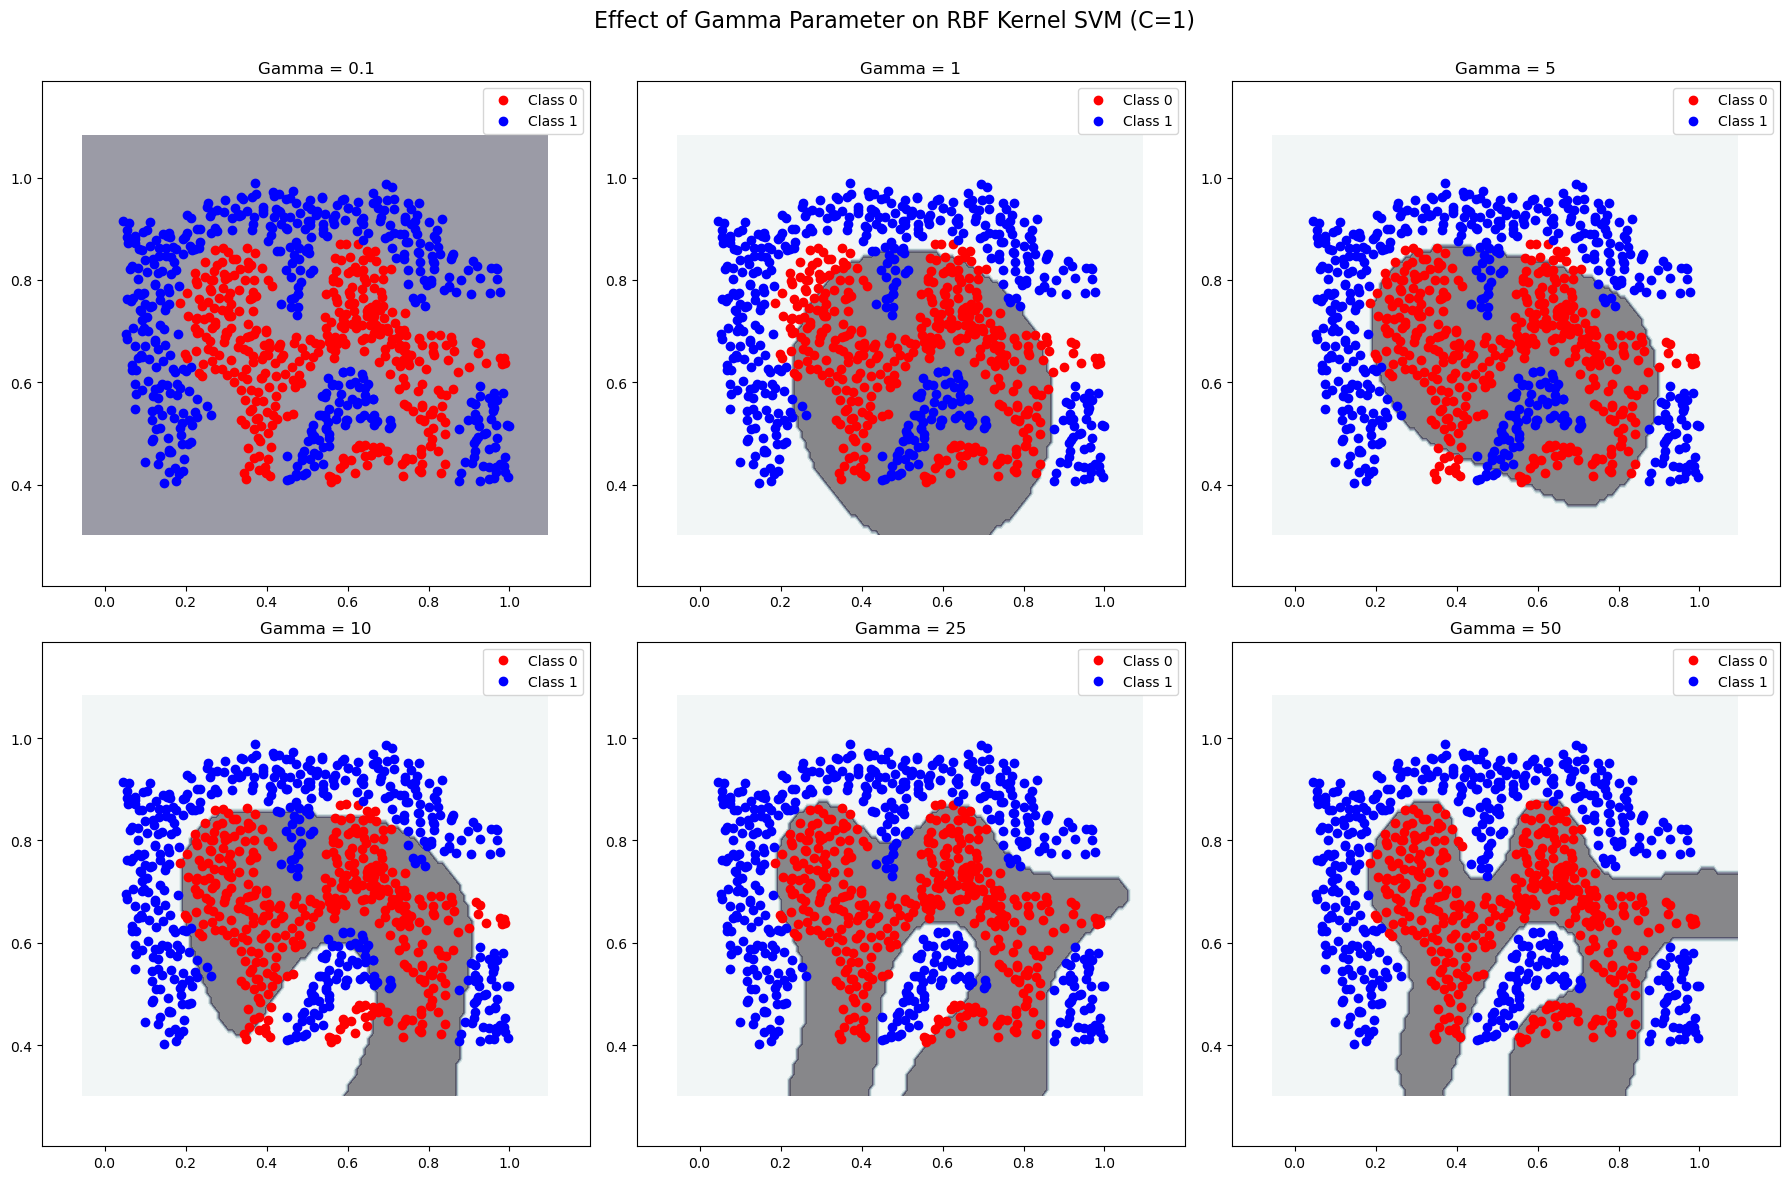

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Function to plot the hyperplane
def plot_hyperplane(clf, X, ax, title=""):
    # Create a mesh to plot in
    h = 0.01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    CS = ax.contourf(xx, yy, Z, cmap=plt.cm.bone, alpha=0.5)
    ax.set_title(title)
    return CS

# Load dataset2
data = np.loadtxt('Data/dataset2.data', delimiter=',')
X = data[:, :2]
Y = data[:, 2].astype(int)

# Create a figure with subplots (2x3 grid)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Define different gamma values to try
gamma_values = [0.1, 1, 5, 10, 25, 50]

# Create and plot SVM classifiers with different gamma values
C = 1  # Fixed regularization parameter
for i, gamma in enumerate(gamma_values):
    # Create and train SVM with RBF kernel
    clf_rbf = svm.SVC(kernel='rbf', gamma=gamma, C=C)
    clf_rbf.fit(X, Y)
    
    # Plot the decision boundary
    plot_hyperplane(clf_rbf, X, axes[i], f"Gamma = {gamma}")
    
    # Plot data points
    axes[i].plot(X[Y==0, 0], X[Y==0, 1], 'or', label='Class 0')
    axes[i].plot(X[Y==1, 0], X[Y==1, 1], 'ob', label='Class 1')
    axes[i].legend()
    axes[i].set_xlim([X[:, 0].min() - 0.2, X[:, 0].max() + 0.2])
    axes[i].set_ylim([X[:, 1].min() - 0.2, X[:, 1].max() + 0.2])

plt.tight_layout()
plt.suptitle('Effect of Gamma Parameter on RBF Kernel SVM (C=1)', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()

### Exercise 4
In this part of the exercise, you will gain more practical skills on how to use a SVM with a Gaussian kernel. The next part will load and display a third dataset. You will be using the SVM with the Gaussian kernel with this dataset.

In the provided dataset, data3, you are given the variables X, y, X_test, y_test. The provided code trains the SVM classifier using the training set (X, y) with some initial parameters. Your task is to use the cross validation set X_test, y_test to determine the best C and gamma parameters to use. You should write any additional code necessary to help you search over the parameters C and gamma. For both C and gamma, It is  suggested trying values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30).

Note that you should try all possible pairs of values for C and gamma (e.g., C = 0.3 and gamma = 0.1). For example, if you try each of the 8 values listed above for C
and for gamma , you would end up training and evaluating (on the cross validation set) a total of 8 x 8 = 64 different models.

43.5


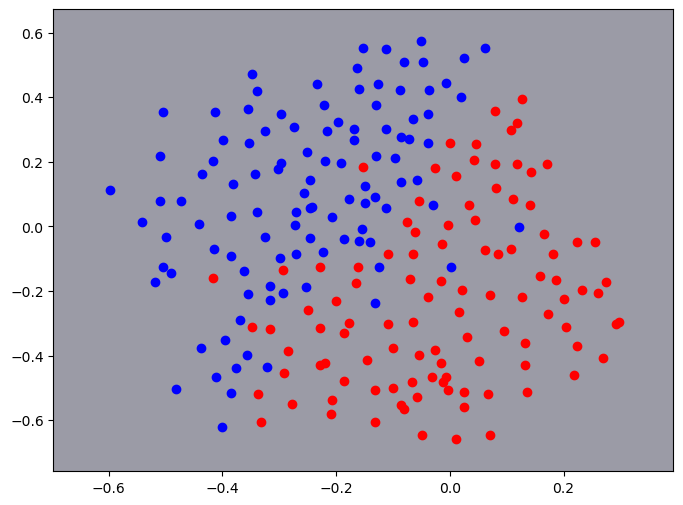

In [10]:
########################################################################################
def plot_hyperplane(clf, X):
    # create a mesh to plot in
    h=0.01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    CS=plt.contourf(xx, yy, Z,cmap=plt.cm.bone,alpha=0.5)
    #CS.cmap.set_under('yellow')
    #CS.cmap.set_over('cyan')


########################################################################################
#cargar dataset3: conjunto de entrenamiento y conjunto de prueba
data=np.loadtxt('dataset3_train.data',delimiter=',')
X=data[:,:2]
y=data[:,2].astype(int)
data=np.loadtxt('dataset3_test.data',delimiter=',')
X_test=data[:,:2]
y_test=data[:,2].astype(int)

########################

##graficar datos de entrenamiento
plt.figure(figsize=(8, 6))

plt.plot(X[y==0,0],X[y==0,1],'or')
plt.plot(X[y==1,0],X[y==1,1],'ob')

########################################################################
C=np.array([0.01, 0.03, 0.1,0.3, 1,3,10,30])       
gamma=np.array([0.01, 0.03, 0.1,0.3, 1,3,10,30])
## su codigo va aqui #########



#por ejemplo para un par de valores, C = 0.01 y gamma = 0.001 se tiene que el clasificador no funciona bien, accuracy es incluso por debajo
#de 50%
clf_rbf     = svm.SVC(kernel='rbf', gamma=gamma[0], C=C[0])
#entrenar
clf_rbf.fit(X, y)
y_pred = clf_rbf.predict(X_test)
por  = (y_test==y_pred).sum()/y_test.size*100
print(por)


  
#graficar frontera para el mejor par (C,gamma)
plot_hyperplane(clf_rbf,X)


plt.show()



Best parameters: C=3.0, gamma=30.0
Best accuracy: 96.50%


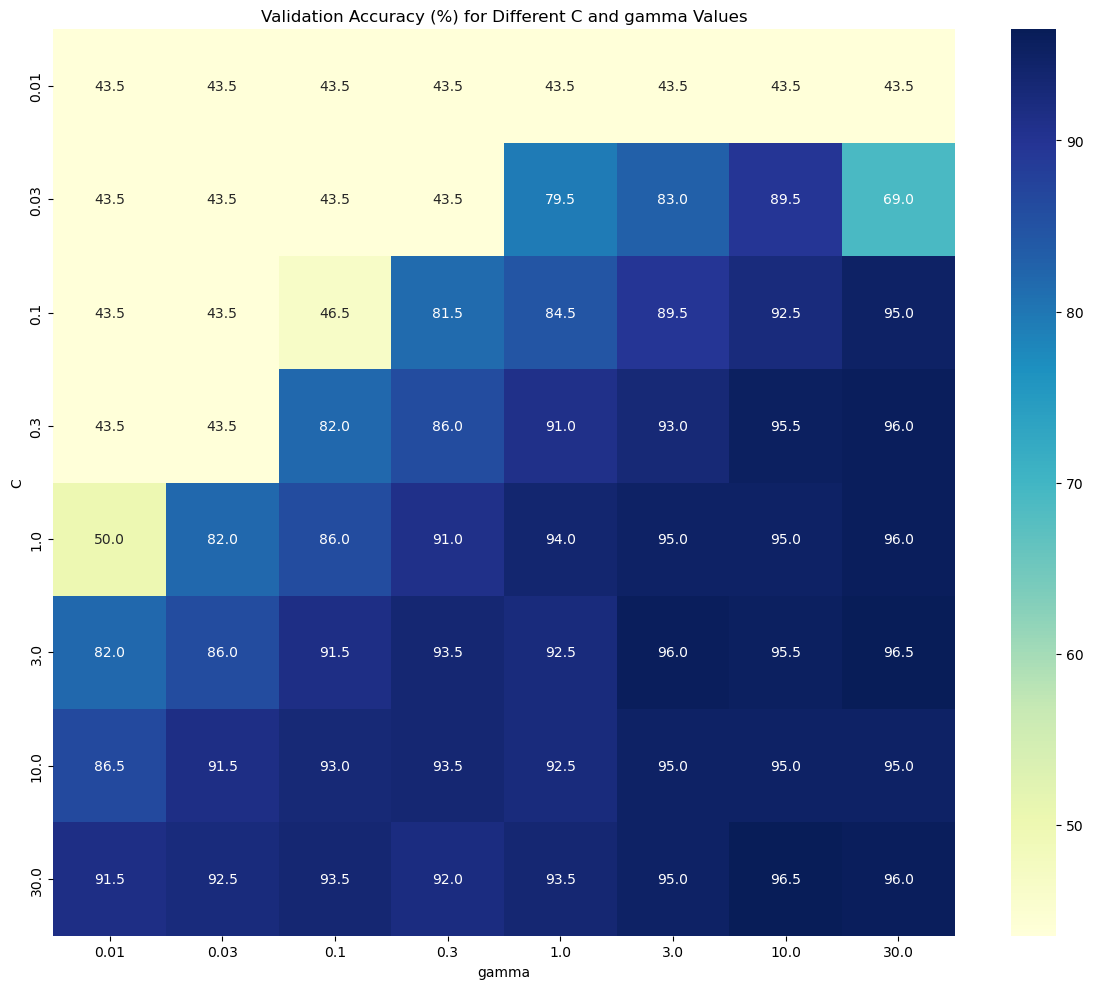

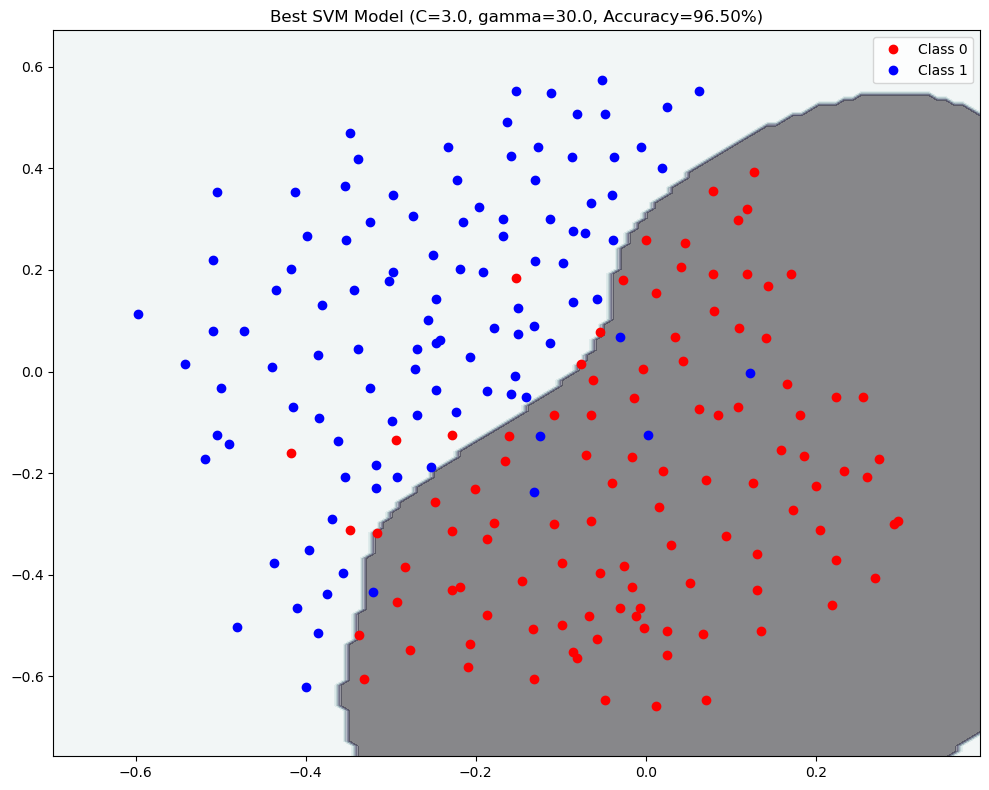

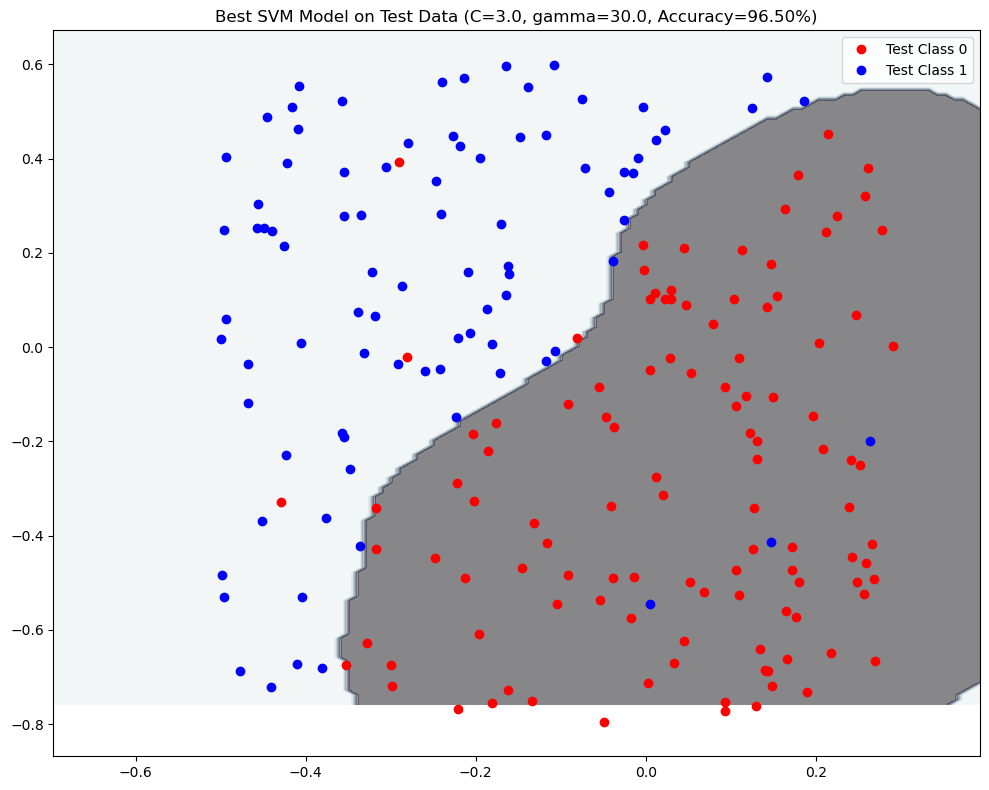

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns

# Function to plot the hyperplane
def plot_hyperplane(clf, X):
    # create a mesh to plot in
    h = 0.01
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    CS = plt.contourf(xx, yy, Z, cmap=plt.cm.bone, alpha=0.5)
    return CS

# Load datasets
data = np.loadtxt('Data/dataset3_train.data', delimiter=',')
X = data[:, :2]
y = data[:, 2].astype(int)
data = np.loadtxt('Data/dataset3_test.data', delimiter=',')
X_test = data[:, :2]
y_test = data[:, 2].astype(int)

# Parameter values to try
C_values = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
gamma_values = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])

# Create grid for results
results = np.zeros((len(C_values), len(gamma_values)))
best_accuracy = 0
best_C = 0
best_gamma = 0
best_classifier = None

# Perform grid search
for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        # Create and train classifier
        clf_rbf = svm.SVC(kernel='rbf', gamma=gamma, C=C)
        clf_rbf.fit(X, y)
        
        # Test on validation set
        y_pred = clf_rbf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred) * 100
        results[i, j] = accuracy
        
        # Keep track of the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_C = C
            best_gamma = gamma
            best_classifier = clf_rbf

print(f"Best parameters: C={best_C}, gamma={best_gamma}")
print(f"Best accuracy: {best_accuracy:.2f}%")

# Visualize results using a heatmap
plt.figure(figsize=(12, 10))
df_results = pd.DataFrame(results, index=C_values, columns=gamma_values)
ax = sns.heatmap(df_results, annot=True, fmt=".1f", cmap="YlGnBu", 
                 xticklabels=gamma_values, yticklabels=C_values)
ax.set_title("Validation Accuracy (%) for Different C and gamma Values")
ax.set_xlabel("gamma")
ax.set_ylabel("C")
plt.tight_layout()
plt.savefig("parameter_grid_search.png")
plt.show()

# Plot the best classifier
plt.figure(figsize=(10, 8))
plt.plot(X[y==0, 0], X[y==0, 1], 'or', label='Class 0')
plt.plot(X[y==1, 0], X[y==1, 1], 'ob', label='Class 1')
plt.title(f"Best SVM Model (C={best_C}, gamma={best_gamma}, Accuracy={best_accuracy:.2f}%)")
plot_hyperplane(best_classifier, X)
plt.legend()
plt.tight_layout()
plt.savefig("best_model.png")
plt.show()

# Additional visualization: Plot test data with the decision boundary
plt.figure(figsize=(10, 8))
plt.plot(X_test[y_test==0, 0], X_test[y_test==0, 1], 'or', label='Test Class 0')
plt.plot(X_test[y_test==1, 0], X_test[y_test==1, 1], 'ob', label='Test Class 1')
plt.title(f"Best SVM Model on Test Data (C={best_C}, gamma={best_gamma}, Accuracy={best_accuracy:.2f}%)")
plot_hyperplane(best_classifier, X)
plt.legend()
plt.tight_layout()
plt.savefig("test_data_visualization.png")
plt.show()

## Your conclussions?